Loading BokehJS ...

{'Willem.Vasco-Pais@gastech.com.kronos': 'Vasco-Pais, Willem', 'Varja.Lagos@gastech.com.kronos': 'Lagos, Varja', 'Valeria.Morlun@gastech.com.kronos': 'Morlun, Valeria', 'Dylan.Scozzese@gastech.com.kronos': 'Scozzese, Dylan', 'Brand.Tempestad@gastech.com.kronos': 'Tempestad, Brand', 'Ada.Campo-Corrente@gastech.com.kronos': 'Campo-Corrente, Ada', 'Irene.Nant@gastech.com.kronos': 'Nant, Irene', 'Stenig.Fusil@gastech.com.kronos': 'Fusil, Stenig', 'Axel.Calzas@gastech.com.kronos': 'Calzas, Axel', 'Inga.Ferro@gastech.com.kronos': 'Ferro, Inga', 'Emile.Arpa@gastech.com.kronos': 'Arpa, Emile', 'Ruscella.Mies.Haber@gastech.com.kronos': 'Mies Haber, Ruscella', 'Orhan.Strum@gastech.com.kronos': 'Strum, Orhan', 'Linnea.Bergen@gastech.com.kronos': 'Bergen, Linnea', 'Mat.Bramar@gastech.com.kronos': 'Bramar, Mat', 'Minke.Mies@gastech.com.kronos': 'Mies, Minke', 'Lidelse.Dedos@gastech.com.kronos': 'Dedos, Lidelse', 'Henk.Mies@gastech.com.kronos': 'Mies, Henk', 'Ingrid.Barranco@gastech.com.kronos': 'Ba

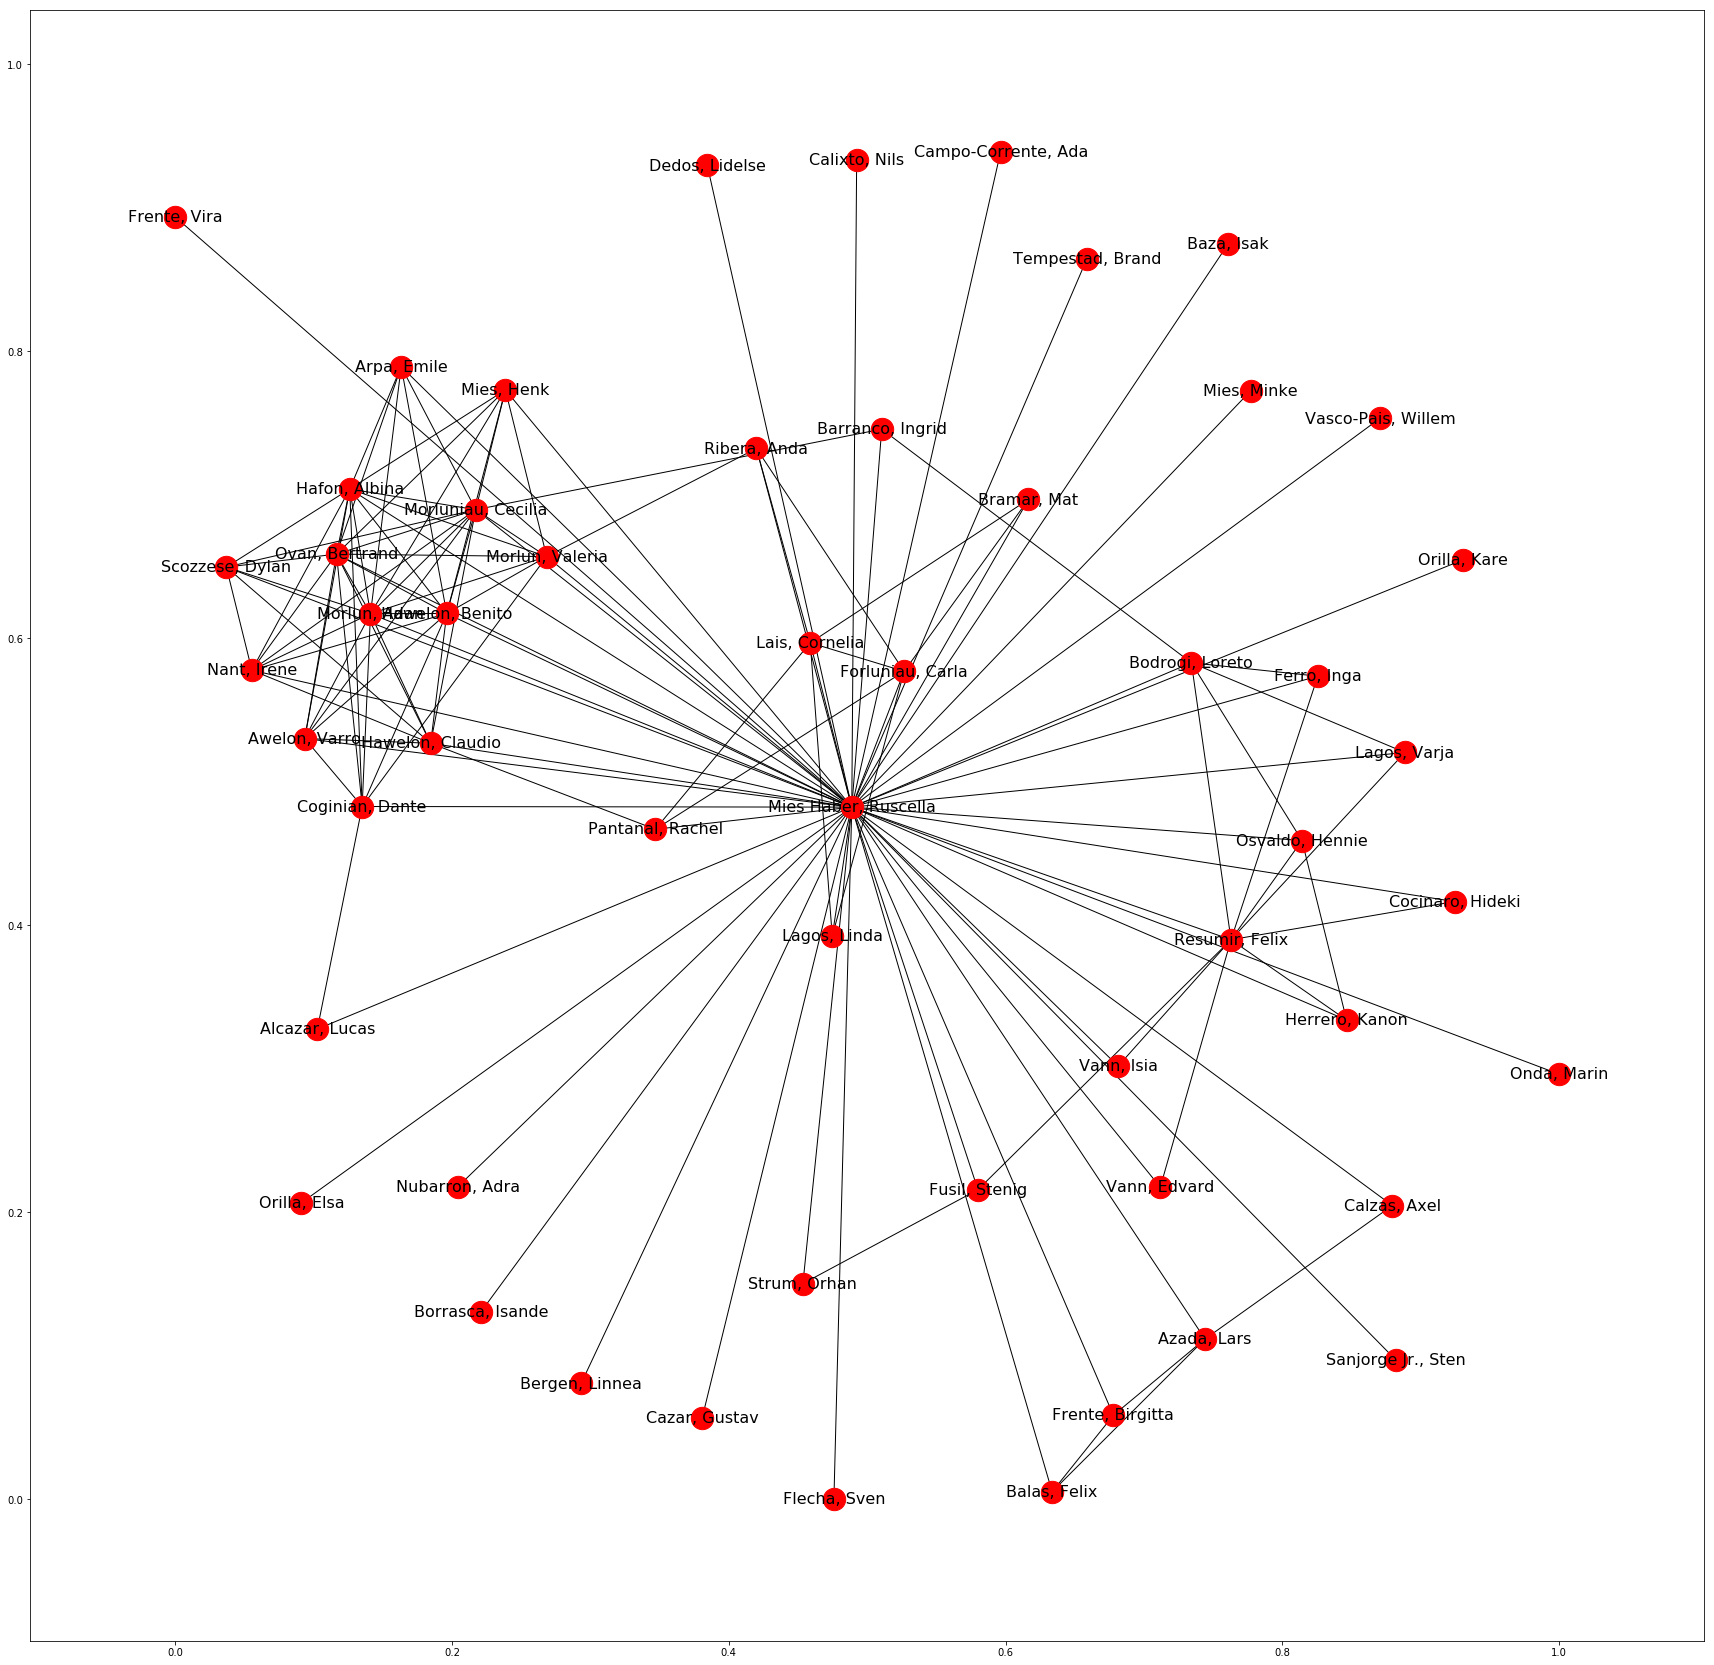

In [5]:
from bokeh.plotting import figure
from bokeh.io import push_notebook, output_notebook, show
import math
from bokeh.models.widgets import Select
from bokeh.models.glyphs import Circle
from bokeh.layouts import column
from re import match
import numpy as np
from sklearn import cluster, datasets
from bokeh.models import HoverTool, PanTool, WheelZoomTool, ColumnDataSource
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact
import ipywidgets as widgets
import pandas as pd
# from word_cloud_master.wordcloud import wordcloud
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

#self-defined module
import data_parser

output_notebook()
#import excel datasets, and convert them into dataframe
employee_data_df = data_parser.parse_excel_data('./data/EmployeeRecords.xlsx', 'Employee Records')
employee_feature_names = data_parser.extract_column_names(employee_data_df)
employee_data_dic = data_parser.build_dic(employee_data_df, employee_feature_names)
employee_dic_list = data_parser.build_row_dic_list(employee_data_df, employee_feature_names)
#print(employee_dic_list)
#Filter out the employees with MilitaryServiceBranch
#We suspect it is more possible for those employees with military training to be..
employees_dic = data_parser.convert_dic_list_to_dic(employee_dic_list, "EmailAddress")
military_employes_list = []
non_military_employes_list = []
for employee in employee_dic_list:
    if not pd.isnull(employee['MilitaryServiceBranch']):
        military_employes_list.append(employee)
    else:
        non_military_employes_list.append(employee)
        
G = nx.DiGraph()
military_set = set()
military_node_labels = {}
index = 0
for employee in military_employes_list:
    G.add_node(employee['EmailAddress'].strip(), node_type="email", details=employee)
    military_node_labels[index] = employee['LastName'] + ", " + employee['FirstName']
    military_set.add(employee['EmailAddress'].strip())



email_record_df = data_parser.parse_csv_data('./data/email_headers.csv', 'ISO-8859-1')
email_record_feature_names = data_parser.extract_column_names(email_record_df)
email_record_dic_list = data_parser.build_row_dic_list(email_record_df, email_record_feature_names)
#print(email_record_dic_list)
for email_record in email_record_dic_list:
    is_military = email_record['From'] in military_set
    is_date = "1/6/2014" in email_record['Date']
    if is_date and is_military:
        #print(email_record['Date'])
        for to in email_record['To'].split(','):
            #if is_military:
            G.add_edge(email_record['From'], to.strip(), rel_type="send email to", details=email_record)
#             elif to.strip() in military_set:
#                 G.add_edge(email_record['From'], to.strip(), rel_type="send email to", details=email_record)
# store locally to allow faster loading
nx.write_adjlist(G,"pp_graph.adjlist")

plt.figure(figsize=(30,30))
subgraphs = [g for g in nx.connected_component_subgraphs(G.to_undirected())]
pos = nx.spring_layout(subgraphs[0])

node_labels = {}
for node in subgraphs[0].nodes():
    node_labels[node] = employees_dic[node]['LastName'] + ", " + employees_dic[node]['FirstName']

print(node_labels)
nx.draw_networkx_nodes(subgraphs[0], pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(subgraphs[0],pos,node_labels,font_size=16)
nx.draw_networkx_edges(subgraphs[0], pos, edgelist=subgraphs[0].edges(), arrows=True, with_labels=True)
plt.show()


I did some exploration about the cause of Diabetes by decision tree, and I found the amount of soda a person have each day might be counted as an effect. If you set Attribute 0 as SODAFREQ, and Attribute 1 as other attributes, the BLUE AREA tends to locate at the right part of the plot, which means if a person drinks soda frequently each day, he/she might get higher possibility of getting Diabetes.